## linear interpolataion
$$f(x;a_1,\cdots,a_n) = a_0\phi_0+\cdots +a_n\phi_n$$

## Polynomial interpolation 
n-th order interpolation 
**Vandermonde matrix**
$$
\begin{pmatrix}1&x_0&\cdots&x_0^n\\
1&x_1&\cdots&x_1^n\\
\vdots&\vdots&\vdots&\vdots\\
1&x_n&\cdots&x_n^n
\end{pmatrix}
\begin{pmatrix}a_0\\a_1\\\vdots\\a_n\end{pmatrix} = f_i
$$



## Error of two-point interpolation
the interval should be enough small
$$\Delta f(x)=\frac{f''(a)}{2}(x-x_i)(x-x_{i+1})\qquad a\in [x_i,x_{i+1}]$$

## Lagrange Interpolation
$$
f\left(  x\right)  =\sum_{i=0}^{n}f_{i}L_{i}\left(  x\right)  +\Delta f\left(
x\right)
$$
Lagrange Polynomials
$$
\begin{aligned}
L_{i}\left(  x\right)    & =\frac{\left(  x-x_{1}\right)  \cdots\left(
x-x_{i-1}\right)  \left(  x-x_{i+1}\right)  \cdots\left(  x-x_{n+1}\right)
}{\left(  x_{i}-x_{1}\right)  \cdots\left(  x_{i}-x_{i-1}\right)  \left(
x_{i}-x_{i+1}\right)  \cdots\left(  x_{i}-x_{n+1}\right)  }\\
L_{i}\left(  x_{k}\right)    & =\delta_{ik}%
\end{aligned}
$$
Error  
$$\Delta f(x) = \frac{f^{(n+1)}(\xi)}{(n+1)!}(x-x_0)(x-x_1)\cdots(x-x_n)\qquad\xi\in[x_0,x_n]$$$$|\Delta f(x)|\le \frac{\gamma}{4(n+1)}h^{n+1}$$$$\gamma = \max|f^{n+1}(x)|\qquad h= \max(x_{i+1} -x_i)$$


In [2]:
import numpy as np

def lagrange(x,i,xData):
    """
    Evaluates the i-th Lagrange polynomial at x
    based on grid data xData
    """
    n = len(xData - 1)
    lagrpoly = 1
    for idx in range(n):
        if idx != i :
            lagrpoly *= (x-xData[idx]) / (xData[i] - xData[idx])
    return lagrpoly

def lagrange_interpolation(x,xData,yData):
    """
    Lagrange interpolation at x
    """
    n = len(xData) - 1
    lagrpoly = np.array([lagrange(x,i,xData) for i in range(n+1)])
    y = np.dot(yData,lagrpoly)
    return y



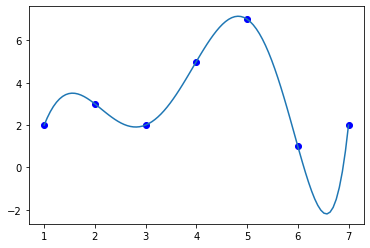

In [66]:
import matplotlib.pyplot as plt
if __name__ == "__main__":
    xData = np.array([1,2,3,4,5,6,7])
    yData = np.array([2,3,2,5,7,1,2])
    xx = np.linspace(1,7,100)
    yy = lagrange_interpolation(xx,xData,yData)
    plt.plot(xData,yData,'ob')
    plt.plot(xx,yy)
    plt.show()
    

## Newton interpolation
Need not to recalculate all teh data
$$p(x) = a_0+a_1(x-x_0)+a_2(x-x_0)(x-x_1)+\cdots$$
$$[x_0] = f_0,[x_0,x_1]=\frac{[x_0]-[x_1]}{x_0-x_1}=a_1$$$$[x_0,x_1,x_2]=\frac{[x_0,x_1]-[x_1,x_2]}{x_0-x_2}=a_2$$
`

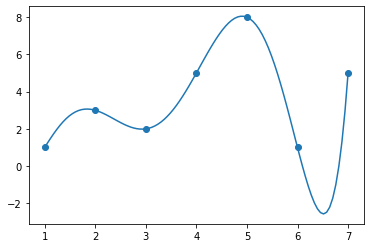

In [70]:
def NewtonInterpolation(x, xData, yData):
    m = xData.size
    a = yData.copy()
    for i in range(1, m): 
        for j in range(m-1, i-1, -1):
            a[j] = (a[j] - a[j-1]) / (xData[j] - xData[j-i])

    result = [a[-1]] * np.ones(x.shape)
    for i in np.arange(m-2, -1, -1):
        result = result * (x - xData[i]) + a[i]

    return result

xData = np.array([1,2,3,4,5,6,7.])
yData = np.array([1,3,2,5,8,1,5.])

xx = np.linspace(1,7,100)
yy = NewtonInterpolation(xx, xData, yData)
plt.figure()
plt.scatter(xData,yData)
plt.plot(xx,yy)
plt.show()

Interpolation error
$$f = p(x)+q(x)$$
$p_n(x)$ is the n-th order interpolation polynomial
$$q(x) = [\pmb x,x_0,x_1,\cdots,x_n](x-x_0)(x-x_1)\cdots\pmb{(x-x_n)}$$

## Aitken Method 
pass

## Spline interpolation
### Cubic spline interpolation
4n unknow constants to be determined , we need 4n equations!
- For each knot: 2 equation ,2(n-1) in totle
$$
S_i(x_i) = f_i, i = 2,3,\cdots,n\\
S_i(x_{i+1}) = S_{i+1}(x_{i+1}) \quad i = 1,2,\cdots,n-1
$$
- Two endpoints : 2 equations
$$S_1(x_1)=f_1,S_n(x_{n+1})=f_{n+1}$$
- Smooth interpolation
$$
S_i'(x_{i+1}) = S'_{i+1}(x_{i+1})\\
S_i''(x_{i+1}) = S''_{i+1}(x_{i+1})\\
i = 1,2,3,\cdots,n-1
$$
- 2 constrains missing!
 - boundary condition at $x_1,x_{n+1}$

**Boundary conditions**
- natural conditions
$$S''_1(x_1) = S''_n(x_{n+1}) = 0$$
- Periodic boundary conditions
$$
S'_1(x_1)= S'_n(x_{n+1})\\
S''_1(x_1)= S''_n(x_{n+1})
$$
- Clamped boundary conditions
$$S_1'(x_1)=p,S_n'(x_{n+1}) = q$$

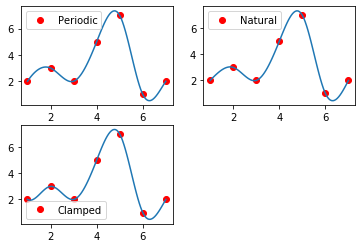

In [5]:
from scipy.interpolate import CubicSpline
x = np.linspace(xData[0],xData[-1],100)
cs = CubicSpline(xData,yData,bc_type = 'periodic')
plt.subplot(2,2,1)
plt.plot(xData,yData,'or',label = 'Periodic')
plt.plot(x,cs(x))
plt.legend()


cs = CubicSpline(xData,yData,bc_type = 'natural')
#等价于
# cs = CubicSpline(xData,yData,bc_type = ((2,0.0),(2,0.0)))
plt.subplot(2,2,2)
plt.plot(xData,yData,'or',label = 'Natural')
plt.plot(x,cs(x))
plt.legend()


cs = CubicSpline(xData,yData,bc_type = ((1,-1),(1,3)))
plt.subplot(2,2,3)
plt.plot(xData,yData,'or',label = 'Clamped')
plt.plot(x,cs(x))
plt.legend()


```scipy.interpolate.CubicSpline(xData,yData,bc_type)```使用方法：  
xData传入要插值的x数据，yData传入要插值的y数据  
bc_type = 'periodic'是周期性边界条件
bc_type = 'natural' 是自然边界条件  
一般情况传入一个2x2的元组，((order_left,value),(order_right,value))
比如，自然条件是$$S''_1(x_1) = S''_n(x_{n+1}) = 0$$
那么等价于传入$((2,0.0),(2,0.0))$  
clamp边界等价于传入$((1,p),(2,q))$

## 高维插值
使用interpolate.interp2d(x, y, fvals, kind)

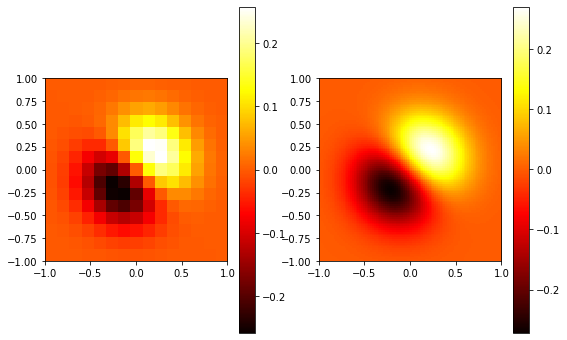

In [6]:
import scipy.interpolate
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

def func(x, y):
    return (x + y) * np.exp(-5.0*(x**2 + y**2))

# X-Y轴分为15*15的网格
y,x = np.mgrid[-1:1:15j, -1:1:15j]

fvals = func(x,y) # 计算每个网格点上的函数值  15*15的值

#三次样条二维插值
newfunc = scipy.interpolate.interp2d(x, y, fvals, kind='cubic')

# 计算100*100的网格上的插值
xnew = np.linspace(-1,1,100) #x
ynew = np.linspace(-1,1,100) #y
fnew = newfunc(xnew, ynew)   #仅仅是y值   100*100的值

# 绘图
# 为了更明显地比较插值前后的区别，使用关键字参数interpolation='nearest'
# 关闭imshow()内置的插值运算。
fig, ax = plt.subplots(1,2,figsize=(9, 6))
im1 = ax[0].imshow(fvals, extent=[-1,1,-1,1], cmap=cm.hot, interpolation='nearest', origin="lower") #pl.cm.jet
#extent=[-1,1,-1,1]为x,y范围
fig.colorbar(im1,ax=ax[0])

im2 = ax[1].imshow(fnew, extent=[-1,1,-1,1], cmap=cm.hot, interpolation='nearest', origin="lower")
fig.colorbar(im2,ax=ax[1])
